In [50]:
"""Data Analyzing & Cleaning"""

from data.clean_data import fetch_check
import matplotlib.pyplot as plt
import ipyparallel as ipp
import pandas as pd
import seaborn as sns
import numpy as np

Key Features for a Predictive Model

For a predictive machine learning model, the strongest predictors are likely:

	- HadHeartAttack
	- HadAngina
	- HadStroke
	- HadDiabetes
	- SmokerStatus
	- BMI
	- AgeCategory
	- Sex

In [51]:
"""
    keepers: An array of hand picked feature to remain in data. keepers can also be empty.
"""

keepers = [
    "Sex",
    "GeneralHealth",
    "PhysicalHealthDays",
    "SleepHours",
    "SmokerStatus",
    "ECigaretteUsage",
    "RaceEthnicityCategory",
    "AgeCategory",
    "WeightInKilograms",
    "BMI",
    "AlcoholDrinkers",
    "HighRiskLastYear",
]

In [52]:
"""
	Run fetch_check()
"""

# Using to_fetch and leaving the null data in place.
df = fetch_check(to_fetch=True, to_dropna=True, to_fillna=True)

INFO:root:Saving raw data...


In [53]:
"""
	Use the keepers array to finish data clean up
"""

# df = df[keepers]

'\n\tUse the keepers array to finish data clean up\n'

In [54]:
df.sample(n=5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HighRiskLastYear
293682,50,0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,...,0.0,1.0,0.0,3.0,6.0,1.88,86.18,24.39,1.00,0.0
4431,11,1,1.0,30.0,0.0,0.0,1.0,8.0,0.0,0.0,...,0.0,1.0,0.0,3.0,9.0,1.70,90.72,31.32,99.99,0.0
18384,39,0,3.0,3.0,0.0,0.0,1.0,8.0,0.0,0.0,...,0.0,0.0,0.0,3.0,8.0,1.80,81.65,25.10,0.00,0.0
26760,43,0,3.0,30.0,0.0,0.0,1.0,6.0,0.0,1.0,...,0.0,0.0,0.0,3.0,11.0,1.68,81.65,29.05,0.00,0.0
30712,43,0,2.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,...,1.0,0.0,0.0,4.0,9.0,1.65,70.31,25.79,0.00,0.0


In [55]:
# Describe dataframe
df.describe()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HighRiskLastYear
count,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,...,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000,293556.000000
mean,34.054347,0.531173,1.742924,6.012067,5.648200,1.744953,0.899532,7.759435,0.508069,0.709108,...,3.354476,1.117422,0.554101,5.261069,8.019182,3.609432,84.196438,32.925634,1.533229,0.327245
std,14.695669,0.499028,4.275967,15.387338,14.122362,11.784114,3.661814,8.396979,6.705196,8.023162,...,17.617141,7.139724,4.986841,15.223773,11.465523,13.555640,21.190309,18.097915,9.940742,5.333095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.910000,22.680000,12.020000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,4.000000,1.630000,68.040000,24.390000,0.000000,0.000000
50%,37.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,7.000000,1.700000,81.650000,28.060000,1.000000,0.000000
75%,47.000000,1.000000,2.000000,4.000000,5.000000,0.000000,1.000000,8.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,3.000000,10.000000,1.780000,97.980000,33.000000,1.000000,0.000000
max,53.000000,1.000000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,...,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,292.570000,99.990000,99.990000,99.990000


In [56]:
# find unique values
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique value ({df[col].dtype})")

State: 54 unique value (int64)
Sex: 2 unique value (int64)
GeneralHealth: 6 unique value (float64)
PhysicalHealthDays: 32 unique value (float64)
MentalHealthDays: 32 unique value (float64)
LastCheckupTime: 5 unique value (float64)
PhysicalActivities: 3 unique value (float64)
SleepHours: 24 unique value (float64)
HadHeartAttack: 3 unique value (float64)
HadAngina: 3 unique value (float64)
HadStroke: 3 unique value (float64)
HadArthritis: 3 unique value (float64)
HadDiabetes: 3 unique value (float64)
SmokerStatus: 5 unique value (float64)
ECigaretteUsage: 5 unique value (float64)
RaceEthnicityCategory: 6 unique value (float64)
AgeCategory: 14 unique value (float64)
HeightInMeters: 106 unique value (float64)
WeightInKilograms: 564 unique value (float64)
BMI: 3680 unique value (float64)
AlcoholDrinkers: 3 unique value (float64)
HighRiskLastYear: 3 unique value (float64)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293556 entries, 342 to 445131
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   State                  293556 non-null  int64  
 1   Sex                    293556 non-null  int64  
 2   GeneralHealth          293556 non-null  float64
 3   PhysicalHealthDays     293556 non-null  float64
 4   MentalHealthDays       293556 non-null  float64
 5   LastCheckupTime        293556 non-null  float64
 6   PhysicalActivities     293556 non-null  float64
 7   SleepHours             293556 non-null  float64
 8   HadHeartAttack         293556 non-null  float64
 9   HadAngina              293556 non-null  float64
 10  HadStroke              293556 non-null  float64
 11  HadArthritis           293556 non-null  float64
 12  HadDiabetes            293556 non-null  float64
 13  SmokerStatus           293556 non-null  float64
 14  ECigaretteUsage        293556 non-null 

<Figure size 1000x800 with 0 Axes>

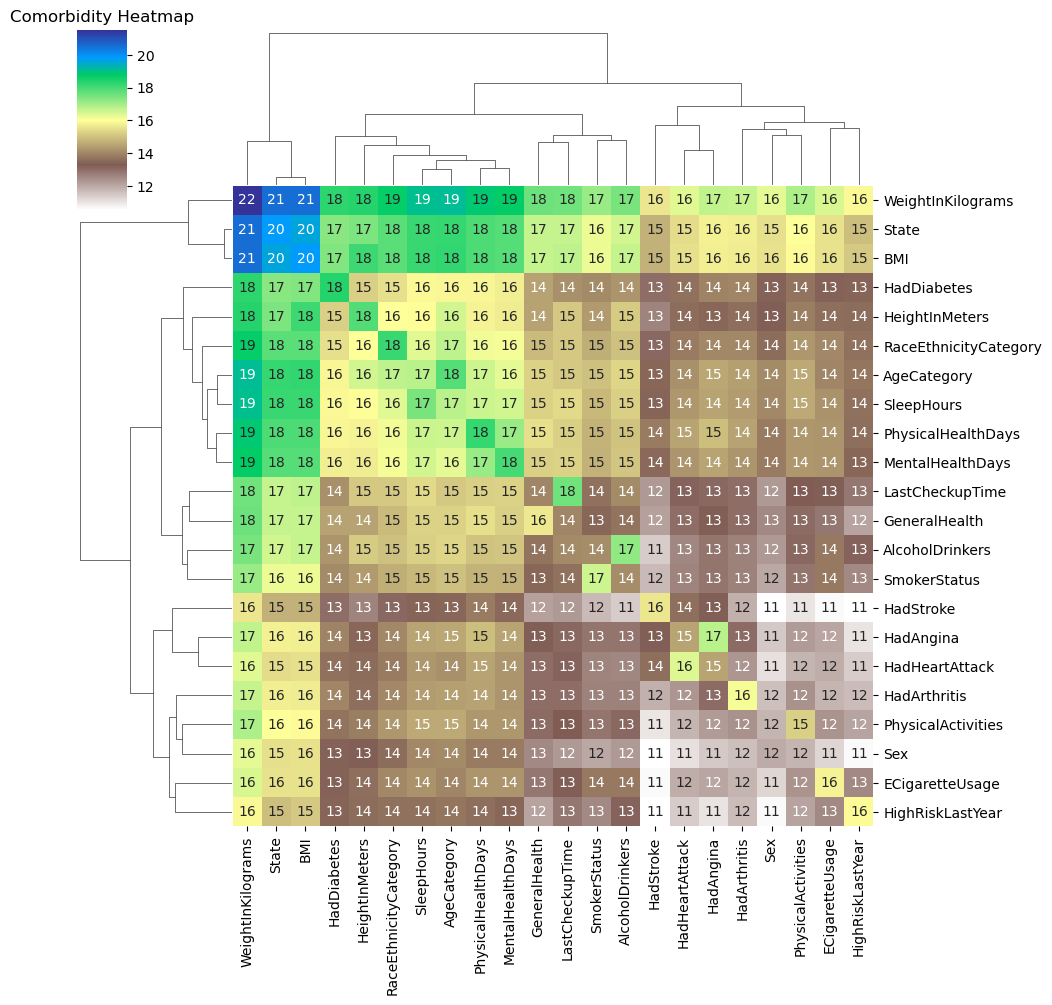

In [ ]:
"""
	Heat map comorbidities
"""
# Sort columns by 'total co-occurrence'
srtd_cols = df.sum(axis=0).sort_values(ascending=False).index

# Transpose index and columns of the dataframe then compute the matrix
srtd_df = df[srtd_cols].T.dot(df)

# Apply logarithmic scaling
srtd_df_log = np.log1p(srtd_df) 
threshold_value = 10
srtd_df_log[srtd_df_log < threshold_value] = 0  # Replace weaker values with 0

# heatmap
plt.figure(figsize=(10,8))
sns.clustermap(srtd_df_log, cmap='terrain_r', annot=True, fmt='.0f')
plt.title('Comorbidity Heatmap')
plt.show()

In [ ]:
WeightInKilograms
State
BMI
RaceEthnicityCategory
SleepHours
AgeCategory
PhysicalHealthDays
MentalHealthDays

HadDiabetes
HeightInMeters
SmokerStatus
AlcoholDrinkers
HadAngina
HadArthritis
PhysicalActivities

Sex
GeneralHealth
LastCheckupTime
HadHeartAttack
HadStroke
ECigaretteUsage
HighRiskLastYear

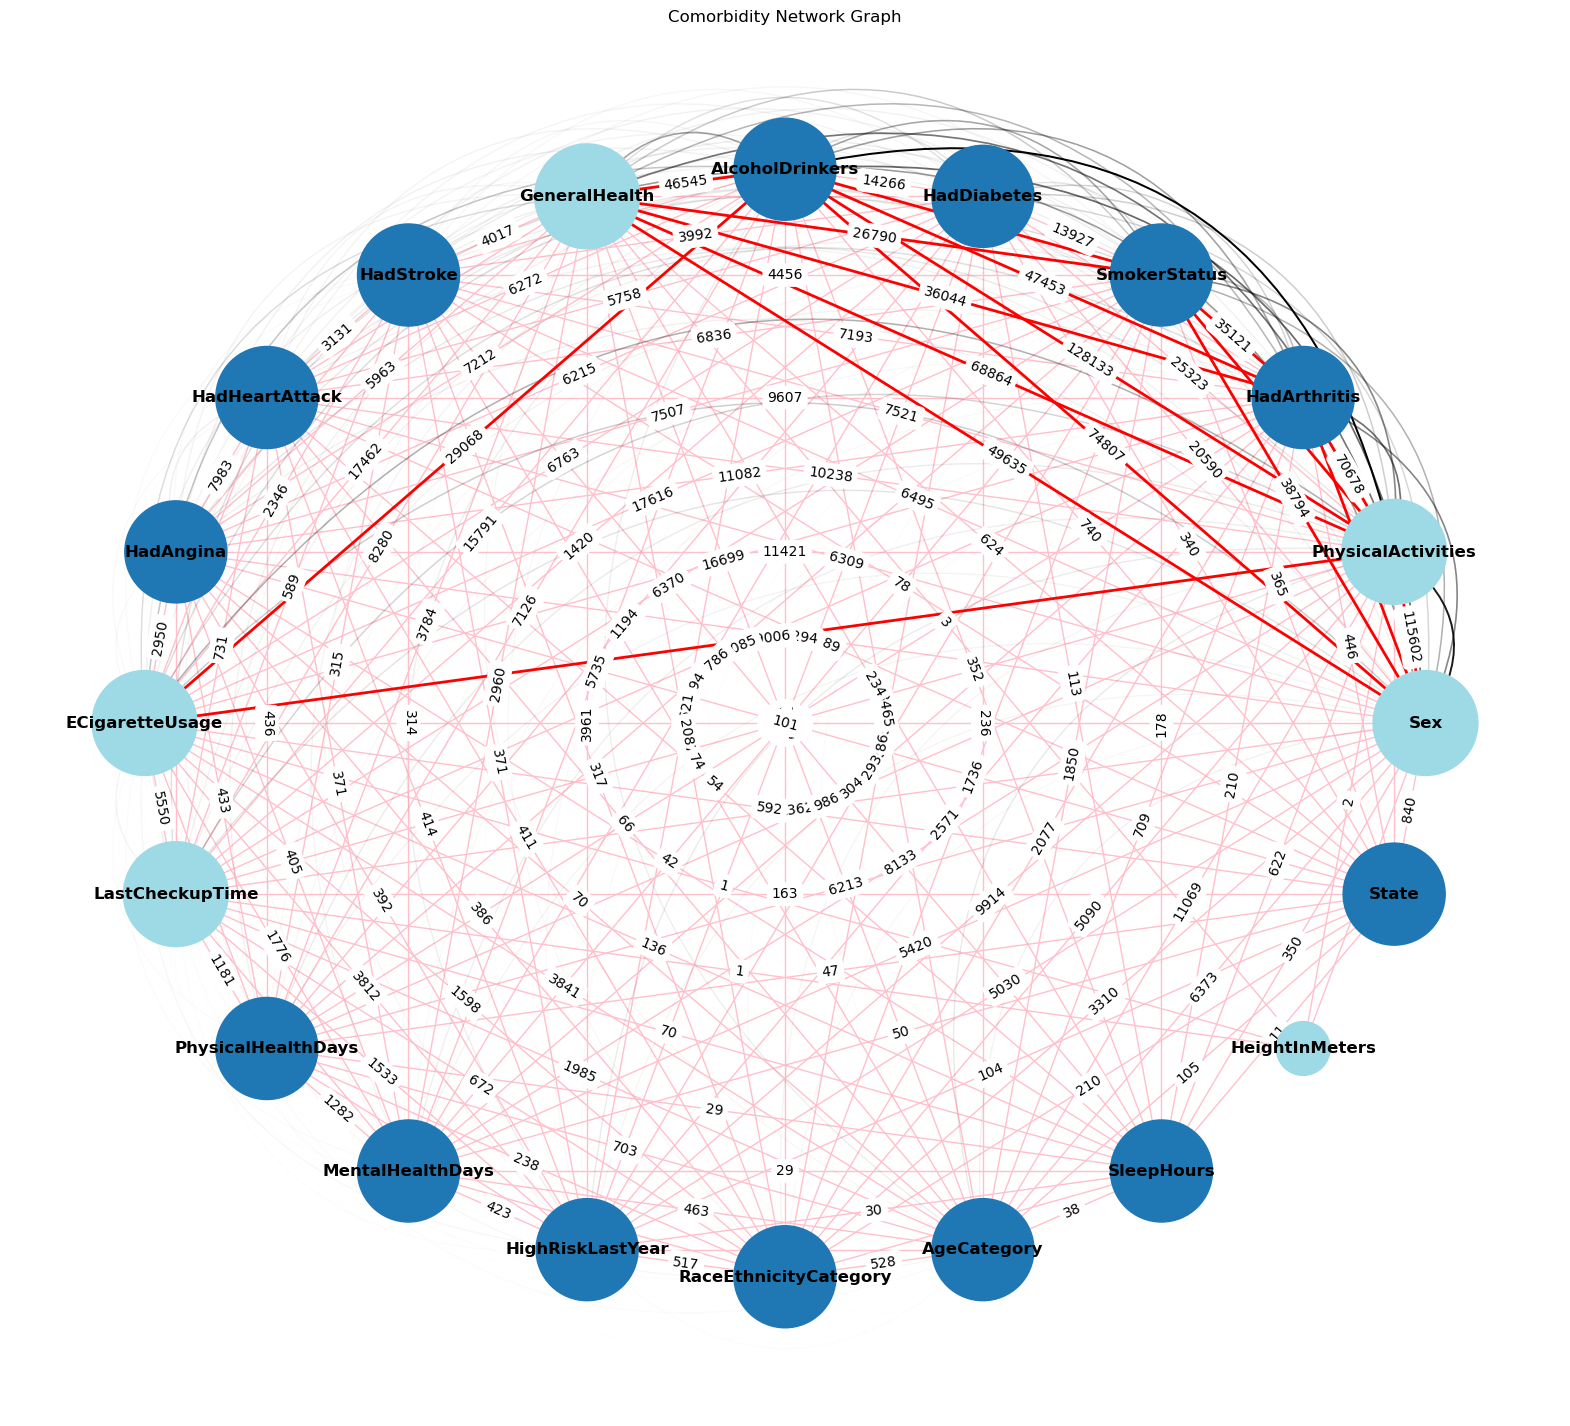

In [61]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from matplotlib import pyplot


# Define conditions columns (adjust based on dataset context)
conditions_columns = df.columns

# Set figure
plt.figure(figsize=(20,18))
plt.title('Comorbidity Network Graph')

# Create a graph
G = nx.Graph()

# Iterate through rows to identify co-occurrences
for _, row in df.iterrows():
  
	# Get all conditions marked as 1 in the row
	active_conditions = [col for col in conditions_columns if row[col] == 1]

	# Add edges between all pairs of active conditions
	for i in range(len(active_conditions)):
		for j in range(i + 1, len(active_conditions)):
			G.add_edge(active_conditions[i], active_conditions[j], weight=G.get_edge_data(active_conditions[i], active_conditions[j], {}).get('weight', 0) + 1)
   
# Detect communities
communities = list(greedy_modularity_communities(G))
community_map = {node: idx for idx, community in enumerate(communities) for node in community}
community_colors = pyplot.get_cmap('tab20', len(communities))

# Degree based node colors
n_colors = [community_colors(community_map[node]) for node in G.nodes()]
pos = nx.circular_layout(G)

edges = G.edges(data=True)
top_edges = sorted(edges, key=lambda x: x[2]['weight'], reverse=True)[:int(len(edges) * 0.1)]
nx.draw(
    G, pos, with_labels=True, node_size=[G.degree[node] * 300 for node in G.nodes()], 
    node_color=n_colors, 
    edge_color='pink', font_weight='bold'
)
nx.draw_networkx_edges(
    G, 
		pos, 
		edgelist=edges, 
		connectionstyle="arc3, rad=0.5", 
		arrows=True, 
		width=[d['weight'] / len(df)+1 for (_, _, d) in edges], 
		alpha=[d['weight'] / max(d['weight'] for (_, _, d) in edges) for (_, _, d) in edges]
)
nx.draw_networkx_edges(G, pos, edgelist=top_edges, edge_color='red', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(c1, c2): w['weight'] for c1, c2, w in edges})

plt.show()

## What we have learned

### Revealed Feature Relationships
  - Top Clusters: These features are strongly related and likely contribute similarly to any analysis (e.g., body composition metrics). 
  
    ``[
      WeightInKilograms,
      State,
      BMI,
      RaceEthnicityCategory,
      SleepHours,
      AgeCategory,
      PhysicalHealthDays,
      MentalHealthDays
    ]``

    
  
  - Middle Clusters: These features indicate a connection between health outcomes and age
  
    ``[
      HadDiabetes,
      HeightInMeters,
      SmokerStatus,
      AlcoholDrinkers,
      HadAngina,
      HadArthritis,
      PhysicalActivities
    ]``

  
  
  - Low Clusters: Features reflecting their co-occurrence as common comorbidities
  
    ``[
      Sex,
      GeneralHealth,
      LastCheckupTime,
      HadHeartAttack,
      HadStroke,
      ECigaretteUsage,
      HighRiskLastYear
    ]``
  
### Next Steps for Interpretation:

##### Body Composition and Health:
 
  - The strong relationships between WeightInKilograms, BMI, and PhysicalHealthDays suggest body composition metrics are highly correlated with physical health outcomes. These could be key predictors for chronic diseases.
 
##### Chronic Disease Clusters:
 
  - The grouping of HadHeartAttack, HadStroke, and HadDiabetes underlines their interdependence. Interventions targeting one condition might benefit the others.
 
##### Behavioral Metrics:
 
  - Features like SmokerStatus and AlcoholDrinkers cluster with general health metrics but show weaker connections to chronic diseases. They might have indirect effects rather than being primary drivers.

### Actionable Insights:

##### Model Feature Selection:

  - Focus on clusters with high interdependence (e.g., BMI, PhysicalHealthDays) for predictive modeling.
    
  - Consider dropping features with minimal connections (e.g., E-CigaretteUsage) to reduce noise.
	
##### Targeted Interventions:

  - For public health planning, prioritize interventions targeting tightly linked chronic diseases, such as diabetes, stroke, and heart attacks.
	
##### Exploratory Hypotheses:

  - Investigate weaker but notable relationships, like AlcoholDrinkers and GeneralHealth, for indirect or confounding effects.
